# Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

## Импорт библиотек

In [1]:
# Отрисовка графиков
import matplotlib.pyplot as plt

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd
from IPython.display import display

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Основные слои
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Input

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

## Описание базы

### База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

### Вывод примеров

In [3]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


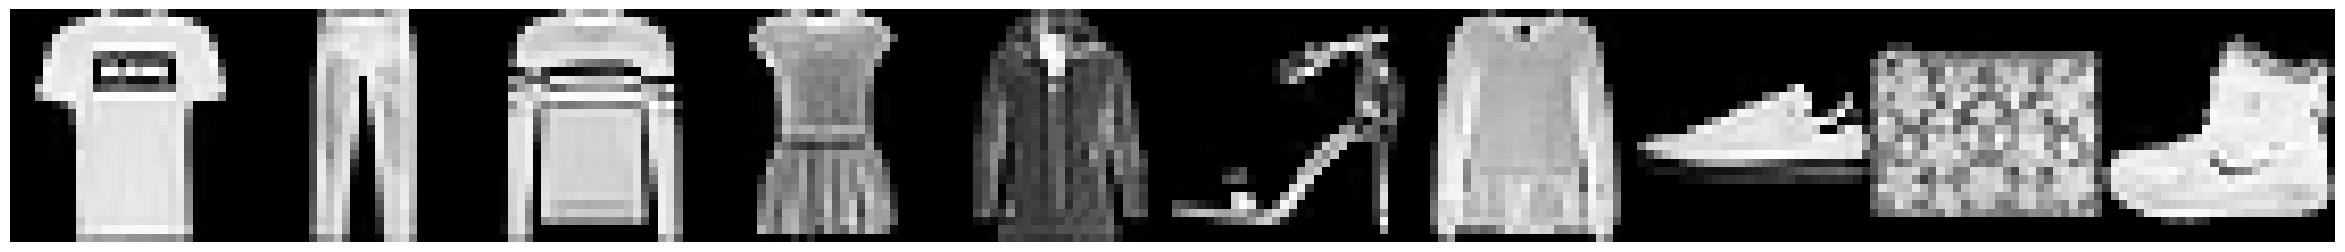

In [4]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

In [5]:
# Ваше решение
# Ячейка нормализации данных
KLS = 10  # Количество классов
x_train = x_train.reshape(x_train.shape[0], -1)  # Преобразование в вектор
x_test = x_test.reshape(x_test.shape[0], -1)  # Преобразование в вектор
x_train = x_train.astype("float32") / 255.0  # Нормализация данных
x_test = x_test.astype("float32") / 255.0  # Нормализация данных

# Преобразование меток в one-hot
y_train = utils.to_categorical(y_train, num_classes=KLS)
y_test = utils.to_categorical(y_test, num_classes=KLS)
# Разделение обучающей выборки на train и validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.167, random_state=42
)

In [6]:
models = [] # Список для хранения моделей
drop_rate = 0.2 # Вероятность Dropout

for ns in (64, 128):
    # Базовая модель
    model_ez = Sequential(
        [
            Input(shape=(x_train.shape[1],)),  # Входной слой
            Dense(ns, activation="relu"),
            Dense(ns // 2, activation="relu"),
            Dense(KLS, activation="softmax"),
        ]
    )
    model_ez.compile(
        loss="categorical_crossentropy",
        optimizer=Adam(learning_rate=0.001),
        metrics=["accuracy"],
    )
    models.append(model_ez)

    # Модель с Dropout
    model_dr = Sequential(
        [
            Input(shape=(x_train.shape[1],)),  # Входной слой
            Dense(ns, activation="relu"),
            Dropout(drop_rate),
            Dense(ns // 2, activation="relu"),
            Dropout(drop_rate),
            Dense(KLS, activation="softmax"),
        ]
    )
    model_dr.compile(
        loss="categorical_crossentropy",
        optimizer=Adam(learning_rate=0.001),
        metrics=["accuracy"],
    )
    models.append(model_dr)

    # Модель с BatchNormalization
    model_batch = Sequential(
        [
            Input(shape=(x_train.shape[1],)),  # Входной слой
            Dense(ns, activation="relu"),
            BatchNormalization(),
            Dense(ns // 2, activation="relu"),
            BatchNormalization(),
            Dense(KLS, activation="softmax"),
        ]
    )
    model_batch.compile(
        loss="categorical_crossentropy",
        optimizer=Adam(learning_rate=0.001),
        metrics=["accuracy"],
    )
    models.append(model_batch)

    # Модель с Dropout + BatchNormalization
    model_all = Sequential(
        [
            Input(shape=(x_train.shape[1],)),  # Входной слой
            Dense(ns, activation="relu"),
            BatchNormalization(),
            Dropout(drop_rate),
            Dense(ns // 2, activation="relu"),
            BatchNormalization(),
            Dropout(drop_rate),
            Dense(KLS, activation="softmax"),
        ]
    )
    model_all.compile(
        loss="categorical_crossentropy",
        optimizer=Adam(learning_rate=0.001),
        metrics=["accuracy"],
    )
    models.append(model_all)

# Увеличенное количество нейронов, с Dropout + BatchNormalization
model_deep = Sequential(
    [
        Input(shape=(x_train.shape[1],)),  # Входной слой
        Dense(256, activation="relu"),
        BatchNormalization(),
        Dropout(drop_rate),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(drop_rate),
        Dense(64, activation="relu"),
        BatchNormalization(),
        Dropout(drop_rate),
        Dense(KLS, activation="softmax"),
    ]
)
model_deep.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
models.append(model_deep)


I0000 00:00:1748292086.780806   67639 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [ ]:
models_params = [] # Список для хранения параметров моделей

# Обучение моделей
for i, model in enumerate(models):
    history = model.fit(
        x_train,
        y_train,
        epochs=15,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0,
    )
    # Определение количества классов и нейронов в зависимости от модели
    nc = 2 
    if i < 4:
        ns = 64
    elif i < 8:
        ns = 128
    else:
        nc = 3
        ns = 256

    # Оценка модели на тестовой выборке
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0) 

    # Сохранение параметров модели
    models_params.append(
        (
            nc,
            ns,
            history.history["accuracy"][-1],
            history.history["val_accuracy"][-1],
            test_accuracy,
        )
    )
    print(f"Модель {i + 1} завершила обучение.")

Модель 1 завершила обучение.
Модель 2 завершила обучение.
Модель 3 завершила обучение.
Модель 4 завершила обучение.
Модель 5 завершила обучение.
Модель 6 завершила обучение.
Модель 7 завершила обучение.
Модель 8 завершила обучение.
Модель 9 завершила обучение.


In [ ]:
model_names = (
    "Простая",
    "С Dropout",
    "С BatchNormalization",
    "С Dropout + BatchNormalizationПростая",
    "Простая",
    "С Dropout",
    "С BatchNormalization",
    "С Dropout + BatchNormalization",
    "Глубокая с Dropout + BatchNormalization",
) # Список названий моделей

# Создание сравнительной таблицы
df_results = pd.DataFrame(
    models_params,
    columns=[
        "Число скрытых слоев",
        "Число нейронов",
        "Train Accuracy",
        "Val Accuracy",
        "Test Accuracy",
    ],
)
df_results.insert(0, "Модель", model_names)


In [ ]:
display(df_results)

,Модель,Число скрытых слоев,Число нейронов,Train Accuracy,Val Accuracy,Test Accuracy
0,Простая,2,64,0.920000,0.885000,0.8811
1,С Dropout,2,64,0.877937,0.872750,0.8689
2,С BatchNormalization,2,64,0.917917,0.875000,0.8675
3,С Dropout + BatchNormalizationПростая,2,64,0.882604,0.875500,0.8692
4,Простая,2,128,0.920604,0.883167,0.8763
5,С Dropout,2,128,0.895229,0.886667,0.8819
6,С BatchNormalization,2,128,0.926208,0.883833,0.8757
7,С Dropout + BatchNormalization,2,128,0.890021,0.880667,0.8626
8,Глубокая с Dropout + BatchNormalization,3,256,0.890750,0.882583,0.8702
